<h1>EDA of Netflix</h1>
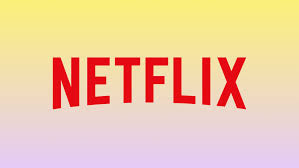

<h2>Dataset Content</h2>
<p>This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.</p>
<ul>Inspiration
    <li>Understanding what content is available in different countries</li>
    <li>Identifying similar content by matching text-based features</li>
    <li>Network analysis of Actors / Directors and find interesting insights</li>
    <li>Is Netflix has increasingly focusing on TV rather than movies in recent years.</li>
</ul>

### Import necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

### Read in updated dataframe

In [2]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Data Investigation

In [3]:
def data_inv(df):
    print('Netflix movies and shows: ',df.shape[0])
    print('Dataset variables: ',df.shape[1])
    print('-'*10)
    print('Dateset columns: \n')
    print(df.columns)
    print('-'*10)
    print('Data-type of each column: \n')
    print(df.dtypes)
    print('-'*10)
    print('Missing rows in each column: \n')
    c=df.isnull().sum()
    print(c[c>0])
data_inv(df)

Netflix movies and shows:  7787
Dataset variables:  12
----------
Dateset columns: 

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
----------
Data-type of each column: 

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
----------
Missing rows in each column: 

director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64


### Data Cleaning


<ul>
    <li>Drop id column</li>
    <li>Drop dublicate shows</li>
    <li>Create a new column shows the number of cast in each row</li>
    <li>We have 10 missing rows in rating column, replace them by the mode</li>
    <li>For the missing rows in added_date column, replace them by January 1,{release_year}</li>
    <li>I think we can not replace missing rows in column country by other countries, but we can use genre to <br>
        identify this country ex: replace missing rows by japan for Anime</li>
    <li>Convert the date_added column from object type to datetime</li>
</ul>

#### Drop duplicated values

In [4]:
dups = df.duplicated(['title','country','type','release_year'])
df[dups].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [5]:
df = df.drop_duplicates(['title','country','type','release_year'])
df = df.drop('show_id',axis=1)

In [6]:
df.cast.head()

0    João Miguel, Bianca Comparato, Michel Gomes, R...
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3    Elijah Wood, John C. Reilly, Jennifer Connelly...
4    Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
Name: cast, dtype: object

##### Clean columns

In [7]:
df['cast'] = df['cast'].replace(np.nan,'Unknown')
def cast_counter(cast):
    if cast=='Unknown':
        return 0
    else:
        lst=cast.split(', ')
        length=len(lst)
        return length
df['number_of_cast']=df['cast'].apply(cast_counter)
df['cast']=df['cast'].replace('Unknown',np.nan)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,number_of_cast
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,11
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",9
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",9
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,12


In [8]:
df = df.reset_index()
df.head()

,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,number_of_cast
0,0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,11
1,1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6
2,2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",9
3,3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",9
4,4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,12


##### Filling none values of rating column by adding median rating value

In [9]:
df['rating']= df['rating'].fillna(df['rating'].mode()[0])

##### Filling none values of date_added column by adding median release_year value

In [10]:
df['date_added'] = df['date_added'].fillna('January 1, {}'.format(str(df['release_year'].mode()[0])))

##### Replace missing rows by japan for Anime


In [11]:
for i,j in zip(df['country'].values,df.index):
    if i==np.nan:
        if ('Anime' in df.loc[j,'listed_in']) or ('anime' in df.loc[j,'listed_in']):
                df.loc[j,'country']='Japan'
        else:
            continue
    else:
        continue

###### Convert the date_added column from object type to datetime

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.head()

,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,number_of_cast
0,0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,11
1,1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6
2,2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",9
3,3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",9
4,4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,12


### Exploratory Data Analysis

<p>Now, it is time to answer some questions.</p>
<ul>
    <li>Understand every category in rating column(Google it)</li>
    <li>Understanding what content is available in different countries.</li>
    <li>Is Netflix has increasingly focusing on TV rather than movies in recent years.</li>
    <li>The most observed rating categories in TV-shows and Movies </li>
    <li>Identifying similar content by matching text-based features</li>
    <li>How many content its release year differ from its year added</li>
</ul>

<p>Let's now google the categories and explore them</p>
<ul>
    <li>TV-MA:This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.</li>
    <li>TV-14:This program contains some material that many parents would find unsuitable for children under 14 years of age.</li>
    <li>TV-PG:This program contains material that parents may find unsuitable for younger children.</li>
    <li>R:Under 17 requires accompanying parent or adult guardian,Parents are urged to learn more about the film before taking their young children with them.</li>
    <li>PG-13:Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.</li>
    <li>NR or UR:If a film has not been submitted for a rating or is an uncut version of a film that was submitted</li>
    <li>PG:Some material may not be suitable for children,May contain some material parents might not like for their young children.</li>
    <li>TV-Y7:This program is designed for children age 7 and above.</li>
    <li>TV-G:This program is suitable for all ages.</li>
    <li>TV-Y:Programs rated TV-Y are designed to be appropriate for children of all ages. The thematic elements portrayed in programs with this rating are specifically designed for a very young audience, including children ages 2-6.</li>
    <li>TV-Y7-FV:is recommended for ages 7 and older, with the unique advisory that the program contains fantasy violence.</li>
    <li>G:All ages admitted. Nothing that would offend parents for viewing by children.</li>
    <li>NC-17:No One 17 and Under Admitted. Clearly adult. Children are not admitted.</li>



Here we discover that UR and NR is the same rating (unrated,Not rated) 
Uncut/extended versions of films that are labeled "Unrated" also contain warnings saying that the uncut version of the film contains content that differs from the theatrical release and might not be suitable for minors.
So we have the fix this. 

In [13]:
for i in df.index:
    if df.loc[i,'rating']=='UR':
        df.loc[i,'rating']='NR'

<p>Now we fix this problem by replace UR category by NR.</p>

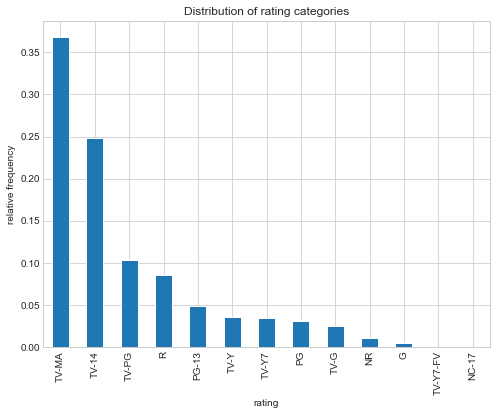

In [14]:
plt.figure(figsize=(8,6))
df['rating'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of rating categories')
plt.xlabel('rating')
plt.ylabel('relative frequency')
plt.show()

<p><p> After expecting the distribution of rating ctegories, it is abvious that TV-MA is the mode<br>
    TV-14 comes in the second place and so on...<br></p>

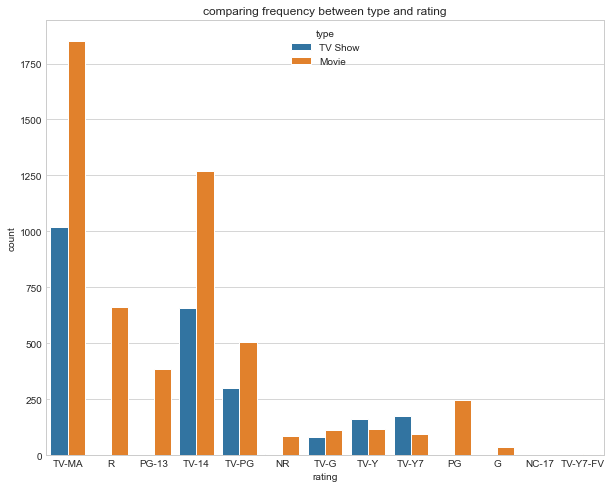

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('comparing frequency between type and rating')
plt.show()

<p>We can say that Movies is the majority category in every rating category on Netflix, except(TV-Y,TV-Y7,TV-Y7-FV).</p> 

In [16]:
df['country'].value_counts().sort_values(ascending=False)

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
India, Pakistan                                                    1
United Kingdom, Belgium                                            1
United Kingdom, India, Sweden                                      1
Lebanon, Qatar                                                     1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

<p>We have huge number of countries in country column so we will focus on (United States,India,United Kingdom,Japan,Canada,Spain)</p>

In [17]:
top_5_country = df['country'].value_counts().sort_values(ascending=False).head().index
for country in top_5_country:
    print(country)

United States
India
United Kingdom
Japan
South Korea


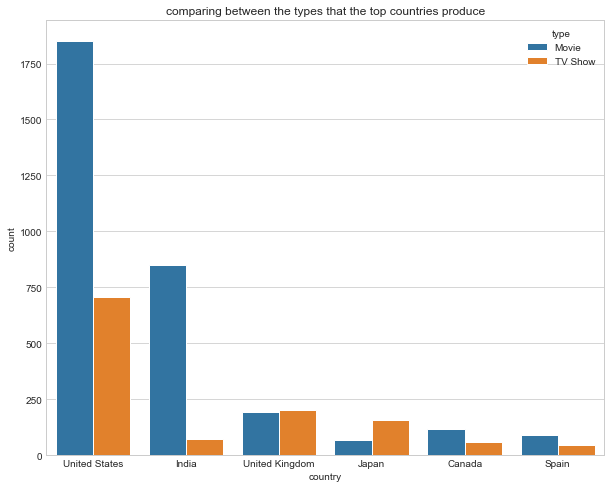

In [18]:
top_productive_countries=df[(df['country']=='United States')|(df['country']=='India')|(df['country']=='United Kingdom')|(df['country']=='Japan')|
                             (df['country']=='Canada')|(df['country']=='Spain')]
plt.figure(figsize=(10,8))
sns.countplot(x='country',hue='type',data=top_productive_countries)
plt.title('comparing between the types that the top countries produce')
plt.show()

<p>UK and Japan produces TV-Shows more than Movies</p>

In [19]:
for i in top_productive_countries['country'].unique():
    print(i)
    print(top_productive_countries[top_productive_countries['country']==i]['rating'].value_counts(normalize=True)*100)
    print('-'*10)

United States
TV-MA       34.559687
TV-14       14.794521
R           14.246575
TV-PG        9.432485
PG-13        8.884540
PG           5.636008
TV-Y7        3.639922
TV-Y         3.170254
TV-G         3.013699
NR           1.409002
G            1.135029
TV-Y7-FV     0.039139
NC-17        0.039139
Name: rating, dtype: float64
----------
India
TV-14       56.338028
TV-MA       24.702059
TV-PG       14.409534
TV-Y7        1.191766
TV-G         0.975081
TV-Y         0.650054
NR           0.650054
PG-13        0.433369
PG           0.325027
R            0.216685
TV-Y7-FV     0.108342
Name: rating, dtype: float64
----------
United Kingdom
TV-MA    42.317380
TV-PG    18.639798
TV-14    17.128463
R         7.808564
TV-G      5.289673
TV-Y      4.030227
PG-13     1.763224
TV-Y7     1.259446
NR        1.259446
PG        0.503778
Name: rating, dtype: float64
----------
Japan
TV-MA    36.725664
TV-14    34.070796
TV-PG    17.256637
TV-Y7     7.522124
PG        2.212389
PG-13     1.327434
TV-Y   

<p>Now let's see if Netflix focuse on TV rather than movies in recent years(2017-2018-2019)</p>

In [20]:
df['year_added']=df['date_added'].dt.year

In [21]:
df['type'].value_counts(normalize=True)

Movie      0.69051
TV Show    0.30949
Name: type, dtype: float64

<p>Relative frequency of movies still has the lead</p>

In [22]:
df.groupby('year_added')['type'].value_counts(normalize=True)*100

year_added  type   
2008        Movie       50.000000
            TV Show     50.000000
2009        Movie      100.000000
2010        Movie      100.000000
2011        Movie      100.000000
2012        Movie      100.000000
2013        Movie       54.545455
            TV Show     45.454545
2014        Movie       76.000000
            TV Show     24.000000
2015        Movie       65.909091
            TV Show     34.090909
2016        Movie       58.239278
            TV Show     41.760722
2017        Movie       70.530612
            TV Show     29.469388
2018        Movie       74.041298
            TV Show     25.958702
2019        Movie       69.530887
            TV Show     30.469113
2020        Movie       65.306122
            TV Show     34.693878
2021        Movie       75.213675
            TV Show     24.786325
Name: type, dtype: float64

<p>We can say that Netflix begin to focus on TV-Shows,but Movies still has the lead in evey year.</p>

In [23]:
dups=df.duplicated(['title'])
df[dups]['title']

Series([], Name: title, dtype: object)

<p>This title have one or more contents</p>

In [24]:
for i in df[dups]['title'].values:
    print(df[df['title']==i][['title','type','release_year','country']])
    print('-'*40)

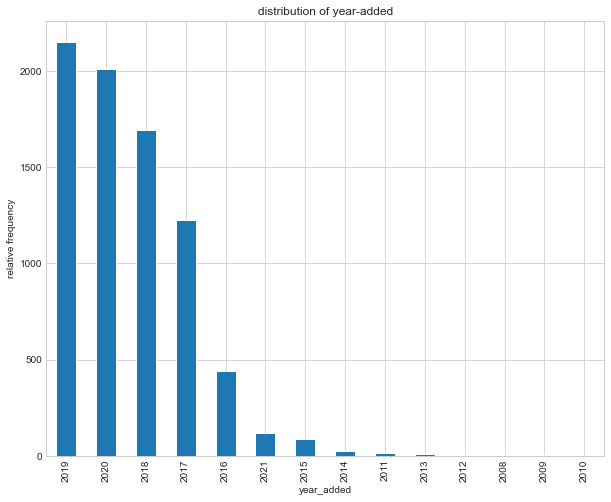

In [25]:
plt.figure(figsize=(10,8))
df['year_added'].value_counts().plot.bar()
plt.title('distribution of year-added')
plt.ylabel('relative frequency')
plt.xlabel('year_added')
plt.show()

<p>2019 is remarkable year for Netflix</p>

In [26]:
counts=0
for i,j in zip(df['release_year'].values,df['year_added'].values):
    if i!=j:
        counts+=1
print('Number of contents that its release year differ from the year added to netflix are ',str(counts))

Number of contents that its release year differ from the year added to netflix are  4961


In [27]:
df2 = df[df.type == 'TV Show'].copy()
df2['duration'] = df2['duration'].str.replace(' Seasons', '')
df2['duration'] = df2['duration'].str.replace(' Season', '').astype(int)
df2.head()

,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,number_of_cast,year_added
0,0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,11,2020
5,5,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,10,2017
11,11,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",12,2018
12,12,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,2019-05-17,2019,TV-MA,1,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,0,2019
16,16,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,2019-03-20,2018,TV-14,1,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",10,2019


In [28]:
df2.loc[df2.duration.idxmax()]['title']

"Grey's Anatomy"

Grey's Anatomy is the movie that has the most seasons.